# tStochastic Neighbor Embedding (t-SNE)

> [Stochastic Neighbor Embedding with Gaussian and Student-t Distributions: Tutorial and Survey](https://arxiv.org/abs/2009.10301): Stochastic Neighbor Embedding (SNE) is a manifold learning and dimensionality reduction method with a probabilistic approach. In SNE, every point is consider to be the neighbor of all other points with some probability and this probability is tried to be preserved in the embedding space. SNE considers Gaussian distribution for the probability in both the input and embedding spaces. However, t-SNE uses the Student-t and Gaussian distributions in these spaces, respectively. In this tutorial and survey paper, we explain SNE, symmetric SNE, t-SNE (or Cauchy-SNE), and t-SNE with general degrees of freedom. We also cover the out-of-sample extension and acceleration for these methods. 
> `Benyamin Ghojogh`, `Ali Ghodsi`, `Fakhri Karray`, `Mark Crowley`

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
raw_data = pd.read_csv('data/A_multivariate_study_of_variation_in_two_species_of_rock_crab_of_genus_Leptograpsus.csv')

data = raw_data.rename(columns={
    'sp': 'Species',
    'sex': 'Sex',
    'index': 'Index',
    'FL': 'Frontal Lobe',
    'RW': 'Rear Width',
    'CL': 'Carapace Midline',
    'CW': 'Maximum Width',
    'BD': 'Body Depth'})

data['Species'] = data['Species'].map({'B':'Blue', 'O':'Orange'})
data['Sex'] = data['Sex'].map({'M':'Male', 'F':'Female'})
data['Class'] = data.Species + data.Sex

data_columns = ['Frontal Lobe',
                'Rear Width',
                'Carapace Midline',
                'Maximum Width',
                'Body Depth']

data.head()

,Species,Sex,Index,Frontal Lobe,Rear Width,Carapace Midline,Maximum Width,Body Depth,Class
0,Blue,Male,1,8.1,6.7,16.1,19.0,7.0,BlueMale
1,Blue,Male,2,8.8,7.7,18.1,20.8,7.4,BlueMale
2,Blue,Male,3,9.2,7.8,19.0,22.4,7.7,BlueMale
3,Blue,Male,4,9.6,7.9,20.1,23.1,8.2,BlueMale
4,Blue,Male,5,9.8,8.0,20.3,23.0,8.2,BlueMale


|    | Species | Sex | Index | Frontal Lobe | Rear Width | Carapace Midline | Maximum Width | Body Depth | Class |
| -- | -- | -- | -- | -- | -- | -- | -- | -- | -- |
| 0 | Blue | Male | 1 | 8.1 | 6.7 | 16.1 | 19.0 | 7.0 | BlueMale |
| 1 | Blue | Male | 2 | 8.8 | 7.7 | 18.1 | 20.8 | 7.4 | BlueMale |
| 2 | Blue | Male | 3 | 9.2 | 7.8 | 19.0 | 22.4 | 7.7 | BlueMale |
| 3 | Blue | Male | 4 | 9.6 | 7.9 | 20.1 | 23.1 | 8.2 | BlueMale |
| 4 | Blue | Male | 5 | 9.8 | 8.0 | 20.3 | 23.0 | 8.2 | BlueMale |

## RAW Data Analysis

### 2-Dimensional Plot

In [ ]:
# reduce data to 2 dimensions
no_components = 2
no_iter = 2000
perplexity = 10
init = 'random'

data_tsne = TSNE(
    n_components=no_components,
    perplexity=perplexity,
    n_iter=no_iter,
    init=init).fit_transform(data[data_columns])

# add columns to original dataset
data[['TSNE1', 'TSNE2']] = data_tsne

data.tail()

|    | Species | Sex | Index | Frontal Lobe | Rear Width | Carapace Midline | Maximum Width | Body Depth | Class | TSNE1 | TSNE2 |
| -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- |
| 195 | Orange | Female | 46 | 21.4 | 18.0 | 41.2 | 46.2 | 18.7 | OrangeFemale | 39.232815 | -1.699857 |
| 196 | Orange | Female | 47 | 21.7 | 17.1 | 41.7 | 47.2 | 19.6 | OrangeFemale | 40.689430 | 0.257805 |
| 197 | Orange | Female | 48 | 21.9 | 17.2 | 42.6 | 47.4 | 19.5 | OrangeFemale | 41.692440 | 1.029953 |
| 198 | Orange | Female | 49 | 22.5 | 17.2 | 43.0 | 48.7 | 19.8 | OrangeFemale | 42.851078 | 2.015537 |
| 199 | Orange | Female | 50 | 23.1 | 20.2 | 46.2 | 52.5 | 21.1 | OrangeFemale | 49.569035 | 3.964387 |

In [ ]:
fig = plt.figure(figsize=(8,8))
plt.title('RAW Data Analysis')
sns.scatterplot(x='TSNE1', y='TSNE2', hue='Class', data=data)

![tStochastic Neighbor Embedding (t-SNE)](./assets/tStochastic-Neighbor-Embedding_01.png)

### 3-Dimensional Plot

In [ ]:
# reduce data to 3 dimensions
no_components = 3
no_iter = 2000
perplexity = 10
init = 'random'

data_tsne = TSNE(
    n_components=no_components,
    perplexity=perplexity,
    n_iter=no_iter,
    init=init).fit_transform(data[data_columns])

# add columns to original dataset
data[['TSNE1', 'TSNE2', 'TSNE3']] = data_tsne

data.tail()

|    | Species | Sex | Index | Frontal Lobe | Rear Width | Carapace Midline | Maximum Width | Body Depth | Class | TSNE1 | TSNE2 | TSNE3 |
| -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- |
| 195 | Orange | Female | 46 | 21.4 | 18.0 | 41.2 | 46.2 | 18.7 | OrangeFemale | -12.564007 | 4.956237 | -2.111369 |
| 196 | Orange | Female | 47 | 21.7 | 17.1 | 41.7 | 47.2 | 19.6 | OrangeFemale | -13.217113 | 5.572454 | -2.733016 |
| 197 | Orange | Female | 48 | 21.9 | 17.2 | 42.6 | 47.4 | 19.5 | OrangeFemale | -13.523155 | 5.879868 | -2.971745 |
| 198 | Orange | Female | 49 | 22.5 | 17.2 | 43.0 | 48.7 | 19.8 | OrangeFemale | -13.959590 | 6.371356 | -3.287457 |
| 199 | Orange | Female | 50 | 23.1 | 20.2 | 46.2 | 52.5 | 21.1 | OrangeFemale | -15.850336 | 8.684433 | -3.833084 |

In [ ]:
class_colours = {
    'BlueMale': '#0027c4', #blue
    'BlueFemale': '#f18b0a', #orange
    'OrangeMale': '#0af10a', # green
    'OrangeFemale': '#ff1500', #red
}

colours = data['Class'].apply(lambda x: class_colours[x])

x=data.TSNE1
y=data.TSNE2
z=data.TSNE3

fig = plt.figure(figsize=(10,10))
plt.title('RAW Data Analysis')
ax = fig.add_subplot(projection='3d')

ax.scatter(xs=x, ys=y, zs=z, s=50, c=colours)

![tStochastic Neighbor Embedding (t-SNE)](./assets/tStochastic-Neighbor-Embedding_02.png)

## Normalized Data Analysis

### 2-Dimensional Plot

In [9]:
# normalize the data columns
# values have to be between 0-1
data_norm = data.copy()
data_norm[data_columns] = MinMaxScaler().fit_transform(data[data_columns])

data_norm.describe()

,Index,Frontal Lobe,Rear Width,Carapace Midline,Maximum Width,Body Depth
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,25.500000,0.527233,0.455365,0.529043,0.515053,0.511645
std,14.467083,0.219832,0.187835,0.216382,0.209919,0.220953
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,0.358491,0.328467,0.382219,0.384000,0.341935
50%,25.500000,0.525157,0.459854,0.528875,0.525333,0.503226
75%,38.000000,0.682390,0.569343,0.684650,0.664000,0.677419
max,50.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# reduce data to 2 dimensions
no_components = 2
no_iter = 1000
perplexity = 10
init = 'random'

data_tsne = TSNE(
    n_components=no_components,
    perplexity=perplexity,
    n_iter=no_iter,
    init=init).fit_transform(data_norm[data_columns])

# add columns to original dataset
data_norm[['TSNE1', 'TSNE2']] = data_tsne

data_norm.tail()

In [ ]:
fig = plt.figure(figsize=(8,8))
plt.title('Normalized Data Analysis')
sns.scatterplot(x='TSNE1', y='TSNE2', hue='Class', data=data_norm)

![tStochastic Neighbor Embedding (t-SNE)](./assets/tStochastic-Neighbor-Embedding_03.png)

### 3-Dimensional Plot

In [13]:
# reduce data to 3 dimensions
no_components = 3
no_iter = 1000
perplexity = 10
init = 'random'

data_tsne = TSNE(
    n_components=no_components,
    perplexity=perplexity,
    n_iter=no_iter,
    init=init).fit_transform(data_norm[data_columns])

# add columns to original dataset
data_norm[['TSNE1', 'TSNE2', 'TSNE3']] = data_tsne

data_norm.tail()

,Species,Sex,Index,Frontal Lobe,Rear Width,Carapace Midline,Maximum Width,Body Depth,Class,TSNE1,TSNE2,TSNE3
195,Orange,Female,46,0.893082,0.839416,0.805471,0.776000,0.812903,OrangeFemale,-12.080337,-5.297920,-2.805268
196,Orange,Female,47,0.911950,0.773723,0.820669,0.802667,0.870968,OrangeFemale,-12.612718,-4.892505,-3.522019
197,Orange,Female,48,0.924528,0.781022,0.848024,0.808000,0.864516,OrangeFemale,-12.811503,-4.782421,-3.574771
198,Orange,Female,49,0.962264,0.781022,0.860182,0.842667,0.883871,OrangeFemale,-13.123312,-4.472091,-3.802315
199,Orange,Female,50,1.000000,1.000000,0.957447,0.944000,0.967742,OrangeFemale,-14.555276,-4.293132,-3.444989


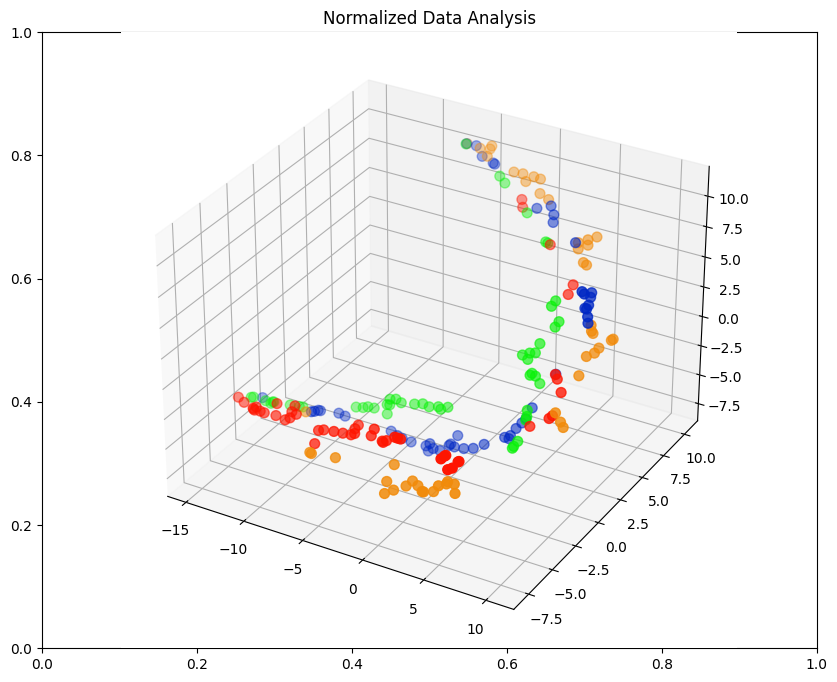

In [14]:
class_colours = {
    'BlueMale': '#0027c4', #blue
    'BlueFemale': '#f18b0a', #orange
    'OrangeMale': '#0af10a', # green
    'OrangeFemale': '#ff1500', #red
}

colours = data_norm['Class'].apply(lambda x: class_colours[x])

x=data_norm.TSNE1
y=data_norm.TSNE2
z=data_norm.TSNE3

fig = plt.figure(figsize=(10,8))
plt.title('Normalized Data Analysis')
ax = fig.add_subplot(projection='3d')

ax.scatter(xs=x, ys=y, zs=z, s=50, c=colours)

![tStochastic Neighbor Embedding (t-SNE)](./assets/tStochastic-Neighbor-Embedding_04.png)

## Standardized Data Analysis

### 2-Dimensional Plot

In [3]:
# standardize date to mean of 0 and std-dev of 1
data_std = data.copy()
data_std[data_columns] = StandardScaler().fit_transform(data[data_columns])

data_std.describe()

,Index,Frontal Lobe,Rear Width,Carapace Midline,Maximum Width,Body Depth
count,200.000000,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,200.000000
mean,25.500000,-7.105427e-17,6.039613e-16,1.065814e-16,-4.973799e-16,0.000000
std,14.467083,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509
min,1.000000,-2.404365e+00,-2.430365e+00,-2.451077e+00,-2.459741e+00,-2.321439
25%,13.000000,-7.695229e-01,-6.772765e-01,-6.802407e-01,-6.258715e-01,-0.770008
50%,25.500000,-9.464874e-03,2.395888e-02,-7.745210e-04,4.909420e-02,-0.038200
75%,38.000000,7.075710e-01,6.083217e-01,7.209382e-01,7.113247e-01,0.752152
max,50.000000,2.155984e+00,2.906815e+00,2.181966e+00,2.315960e+00,2.215766


In [4]:
# reduce data to 2 dimensions
no_components = 2
no_iter = 1000
perplexity = 10
init = 'random'

data_tsne = TSNE(
    n_components=no_components,
    perplexity=perplexity,
    n_iter=no_iter,
    init=init).fit_transform(data_std[data_columns])

# add columns to original dataset
data_std[['TSNE1', 'TSNE2']] = data_tsne

data_std.tail()

,Species,Sex,Index,Frontal Lobe,Rear Width,Carapace Midline,Maximum Width,Body Depth,Class,TSNE1,TSNE2
195,Orange,Female,46,1.668399,2.049750,1.280706,1.246203,1.366870,OrangeFemale,-19.024458,-30.682007
196,Orange,Female,47,1.754443,1.699132,1.351117,1.373555,1.630320,OrangeFemale,-19.906315,-28.975761
197,Orange,Female,48,1.811806,1.738090,1.477856,1.399026,1.601048,OrangeFemale,-20.615889,-29.388590
198,Orange,Female,49,1.983895,1.738090,1.534185,1.564583,1.688865,OrangeFemale,-21.365829,-28.601738
199,Orange,Female,50,2.155984,2.906815,1.984816,2.048521,2.069405,OrangeFemale,-23.417517,-29.936642


<AxesSubplot: title={'center': 'Standardized Data Analysis'}, xlabel='TSNE1', ylabel='TSNE2'>

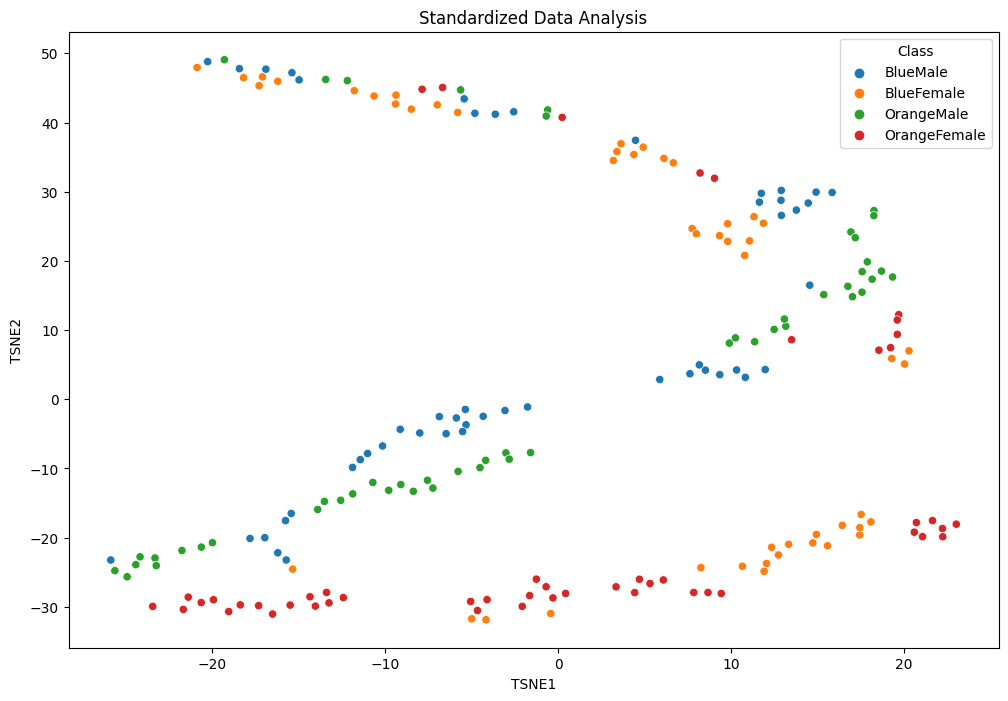

In [6]:
fig = plt.figure(figsize=(12,8))
plt.title('Standardized Data Analysis')
sns.scatterplot(x='TSNE1', y='TSNE2', hue='Class', data=data_std)

![tStochastic Neighbor Embedding (t-SNE)](./assets/tStochastic-Neighbor-Embedding_05.png)

### 3-Dimensional Plot

In [25]:
# reduce data to 3 dimensions
no_components = 3
no_iter = 1000
perplexity = 10
init = 'random'

data_tsne = TSNE(
    n_components=no_components,
    perplexity=perplexity,
    n_iter=no_iter,
    init=init).fit_transform(data_std[data_columns])

# add columns to original dataset
data_std[['TSNE1', 'TSNE2', 'TSNE3']] = data_tsne

data_std.tail()

,Species,Sex,Index,Frontal Lobe,Rear Width,Carapace Midline,Maximum Width,Body Depth,Class,TSNE1,TSNE2,TSNE3
195,Orange,Female,46,1.668399,2.049750,1.280706,1.246203,1.366870,OrangeFemale,-1.953212,-13.015729,-1.211412
196,Orange,Female,47,1.754443,1.699132,1.351117,1.373555,1.630320,OrangeFemale,-1.459929,-13.489538,-0.415171
197,Orange,Female,48,1.811806,1.738090,1.477856,1.399026,1.601048,OrangeFemale,-1.535268,-13.647163,-0.280491
198,Orange,Female,49,1.983895,1.738090,1.534185,1.564583,1.688865,OrangeFemale,-1.565435,-13.897476,0.116366
199,Orange,Female,50,2.155984,2.906815,1.984816,2.048521,2.069405,OrangeFemale,-2.764453,-14.816412,0.161993


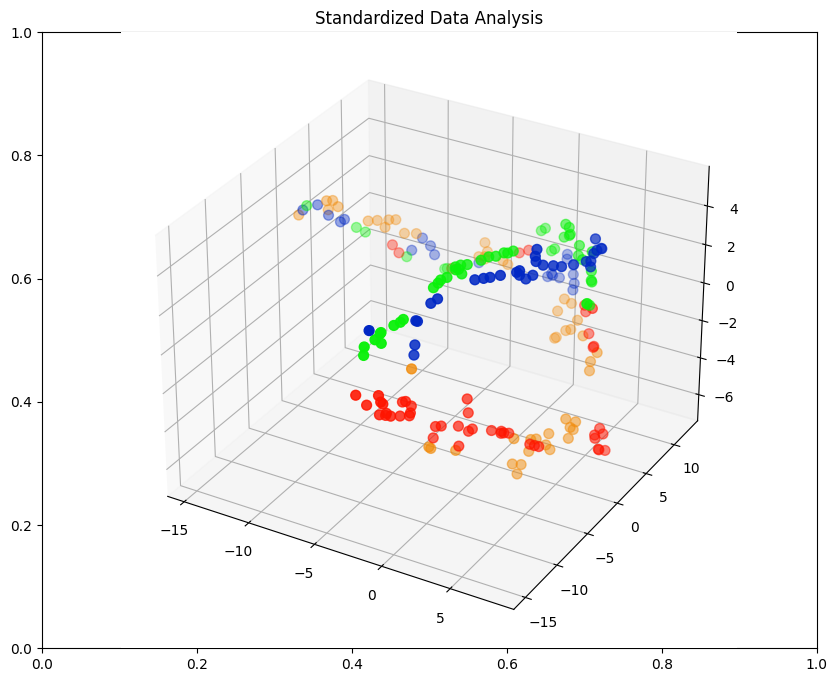

In [26]:
class_colours = {
    'BlueMale': '#0027c4', #blue
    'BlueFemale': '#f18b0a', #orange
    'OrangeMale': '#0af10a', # green
    'OrangeFemale': '#ff1500', #red
}

colours = data_std['Class'].apply(lambda x: class_colours[x])

x=data_std.TSNE1
y=data_std.TSNE2
z=data_std.TSNE3

fig = plt.figure(figsize=(10,8))
plt.title('Standardized Data Analysis')
ax = fig.add_subplot(projection='3d')

ax.scatter(xs=x, ys=y, zs=z, s=50, c=colours)

![tStochastic Neighbor Embedding (t-SNE)](./assets/tStochastic-Neighbor-Embedding_06.png)